In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 20

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 0.75, 2)
    prod_func = lambda x: inverse_decay(x, 0.75, 2)
    consumer_producer = ConsumerProducer(prod_func, cons_func, 30, 5, 0.57, init_following_rates_method='equal')
    #consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(60, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

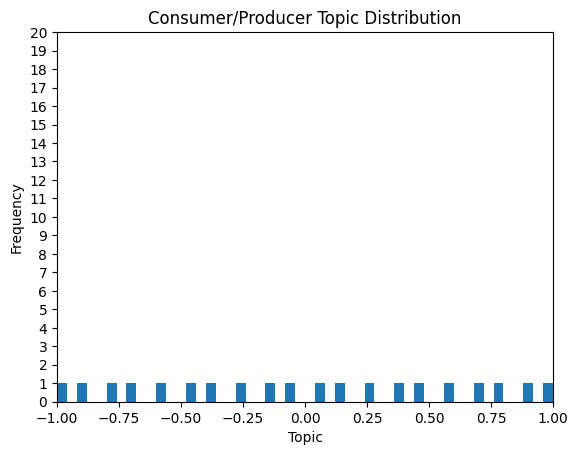

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

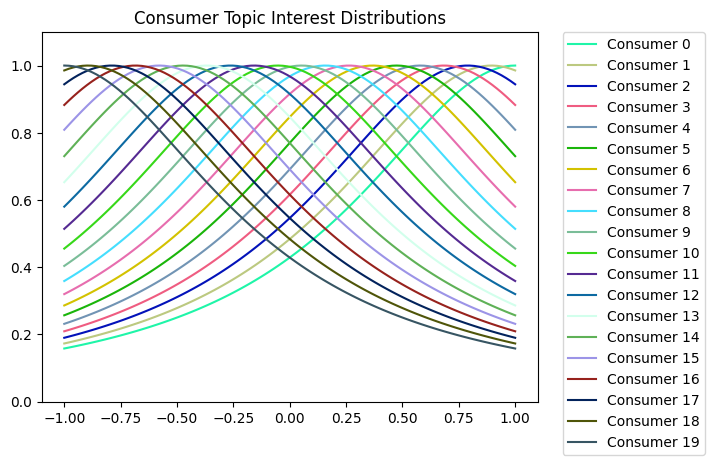

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

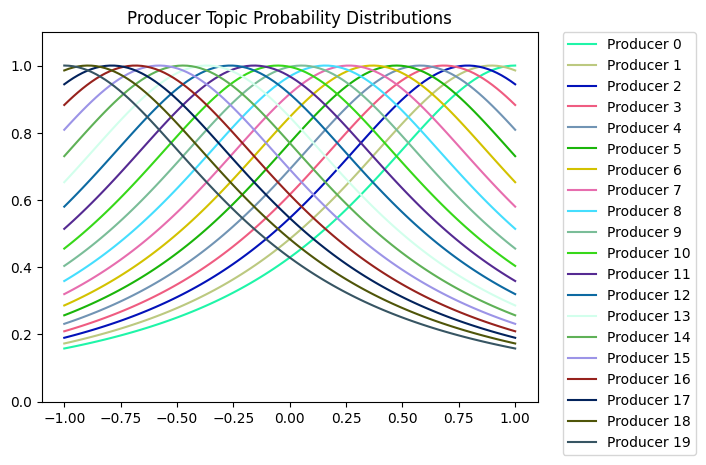

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100, topic_position='center')

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing consumer 15
Optimizing consumer 16
Optimizing consumer 17
Optimizing consumer 18
Optimizing consumer 19
Optimizing influencer 20
Optimizing producer 0
Optimization succeeded (overall 0.01123045792337507s): nit=3, nfev=14, njev=7.
Optimizing producer 1
Optimization succeeded (overall 0.010168874985538423s): nit=5, nfev=18, njev=9.
Optimizing producer 2
Optimization succeeded (overall 0.010118875070475042s): nit=5, nfev=18, njev=9.
Optimizing producer 3
Optimization succeeded (overall 0.008036541054025292s): nit=4, nfev=14, njev=7.
Optimizing producer 4
Optimization succeeded (overall 0.008009208017028868s): nit=4, nfev=14, njev=7.
Optimizing produ

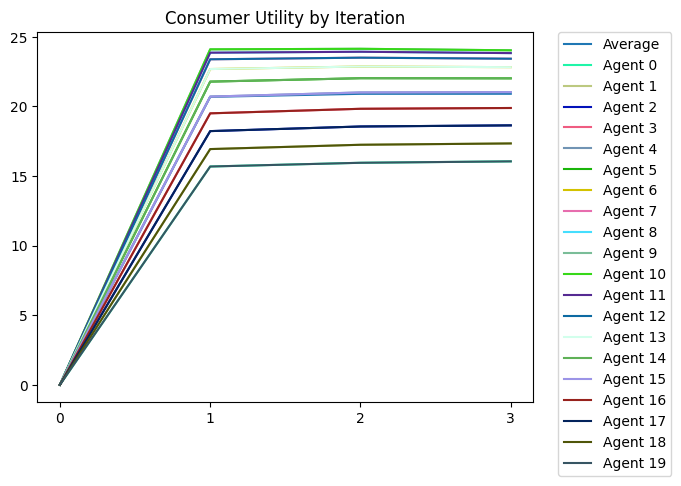

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

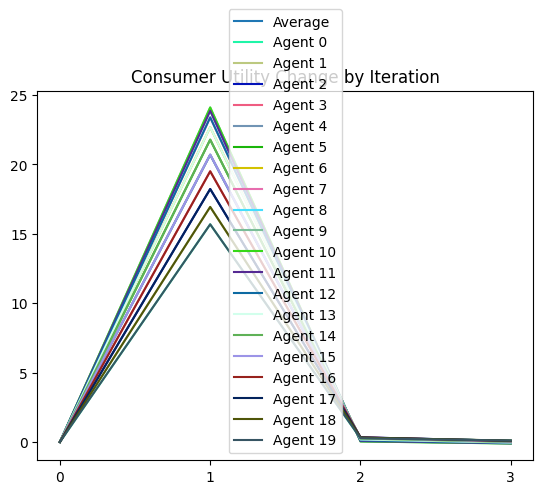

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

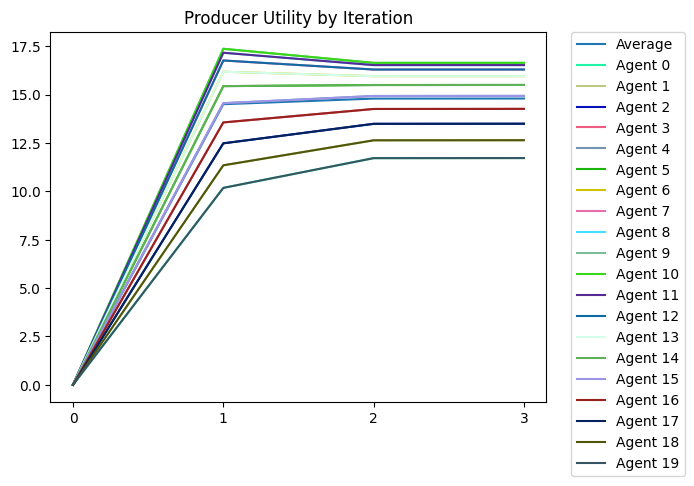

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

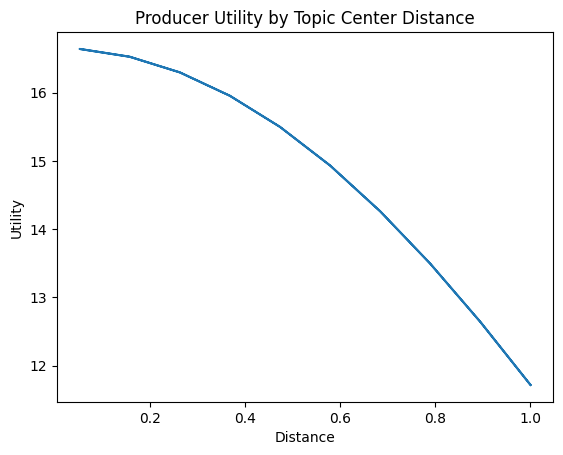

In [15]:
plt.figure()
plt.title('Producer Utility by Topic Center Distance')
topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
utilities = []
for producer in content_market.producers:
    main_interest = producer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    utilities.append(stats.producer_stats[producer.index].utilities[-1])
plt.plot(distances, utilities)
plt.xlabel('Distance')
plt.ylabel('Utility')
plt.show()

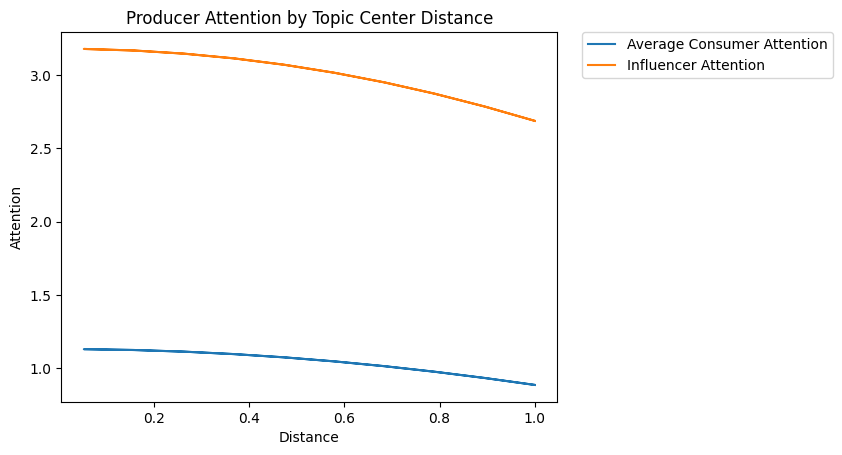

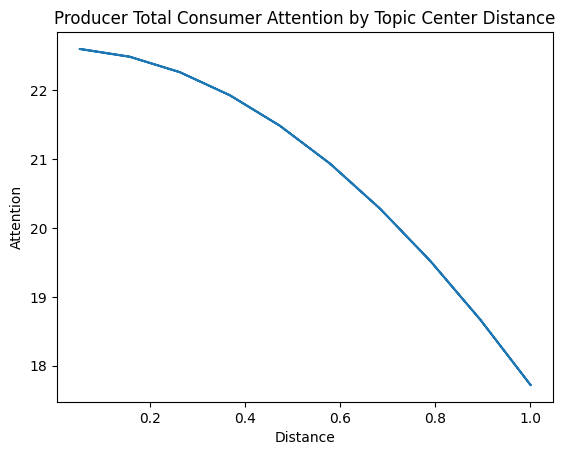

In [16]:

topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
avg_consumer_attentions = []
total_consumer_attentions = []
influencer_attentions = []
for producer in content_market.producers:
    main_interest = producer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    influencer_attentions.append(stats.influencer_stats[content_market.influencers[0].index].following_rates[-1][producer.index])
    consumer_attn = 0
    for consumer in content_market.consumers:
        consumer_attn += stats.consumer_stats[consumer.index].following_rates[-1][producer.index]
    avg_consumer_attentions.append(consumer_attn / len(content_market.consumers))
    total_consumer_attentions.append(consumer_attn)
plt.figure()
plt.title('Producer Attention by Topic Center Distance')
plt.plot(distances, avg_consumer_attentions, label='Average Consumer Attention')
plt.plot(distances, influencer_attentions, label='Influencer Attention')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Distance')
plt.ylabel('Attention')
plt.show()

plt.figure()
plt.title('Producer Total Consumer Attention by Topic Center Distance')
plt.plot(distances, total_consumer_attentions, label='Total Consumer Attention')
plt.xlabel('Distance')
plt.ylabel('Attention')
plt.show()

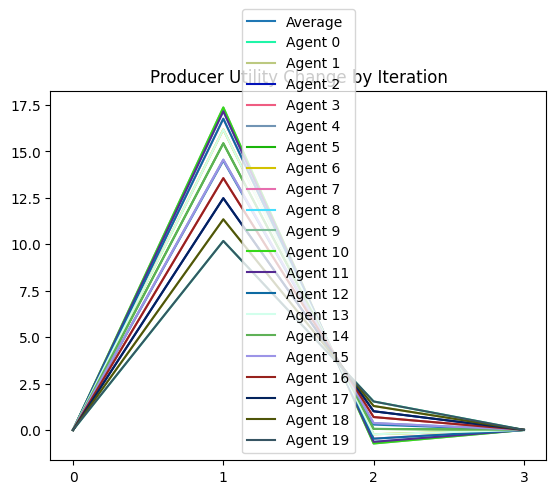

In [17]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

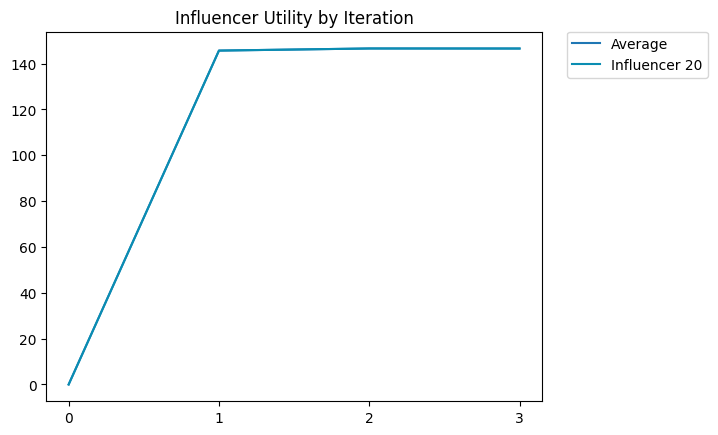

In [18]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

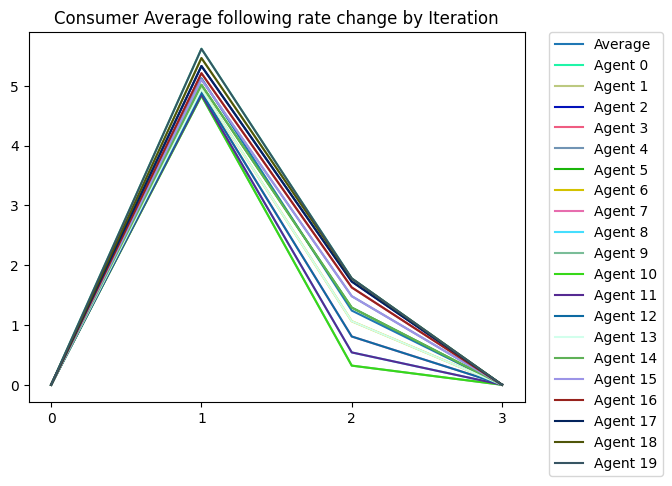

In [19]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

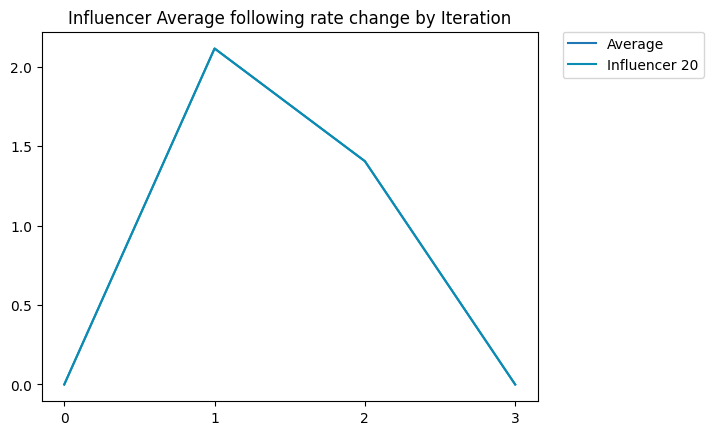

In [20]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

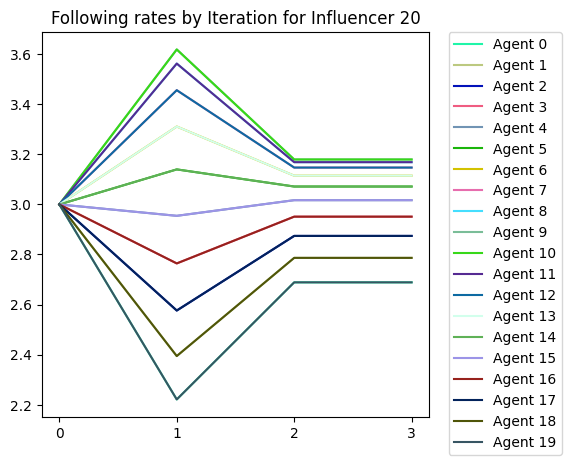

In [21]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

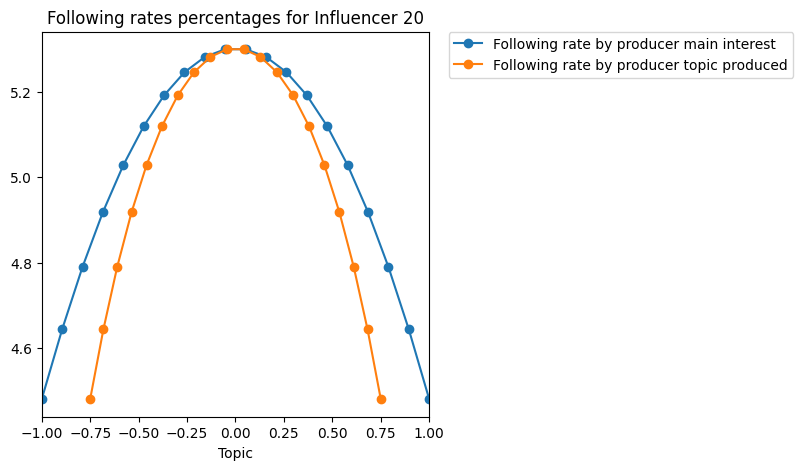

In [22]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

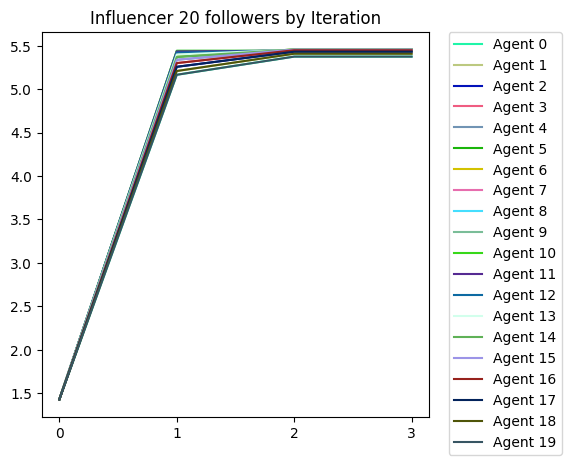

In [23]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

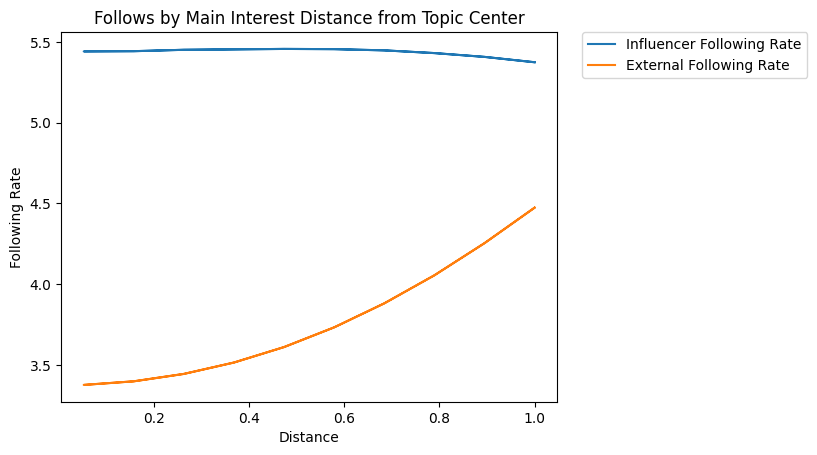

In [24]:
plt.figure()
plt.title('Follows by Main Interest Distance from Topic Center')
topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
influencer_rates = []
#closest_producer_rates = []
external_rates = []
for consumer in content_market.consumers:
    main_interest = consumer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    influencer_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][content_market.influencers[0].index])
    external_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][-1])

    # closest_producer = sorted(content_market.producers, key=lambda x: np.linalg.norm(main_interest - x.main_interest))[0]
    # closest_producer_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][closest_producer.index])
plt.plot(distances, influencer_rates, label='Influencer Following Rate')
plt.plot(distances, external_rates, label='External Following Rate')
#plt.plot(distances, closest_producer_rates, label='Closest Producer Following Rate')
plt.xlabel('Distance')
plt.ylabel('Following Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

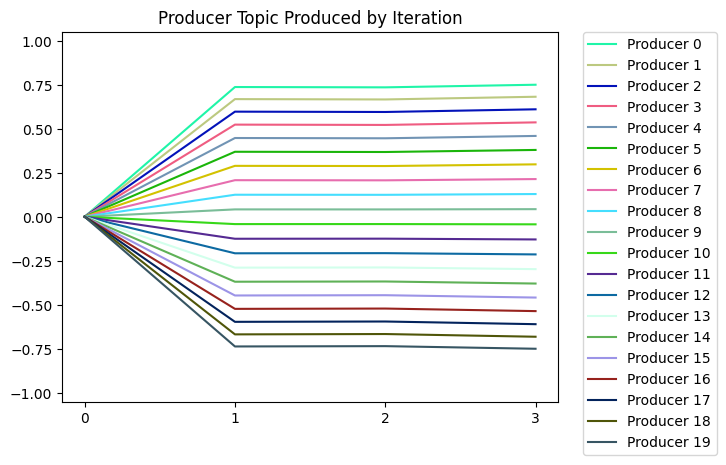

In [44]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

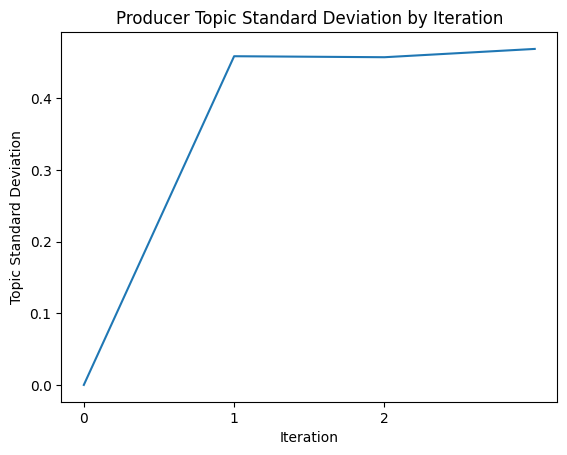

In [26]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

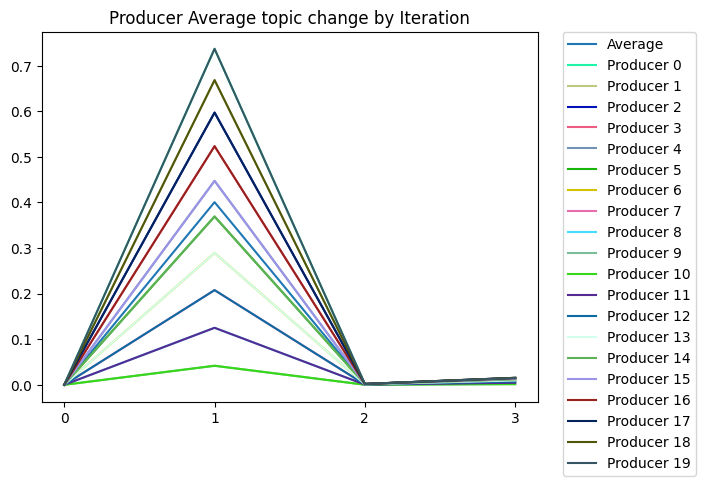

In [27]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

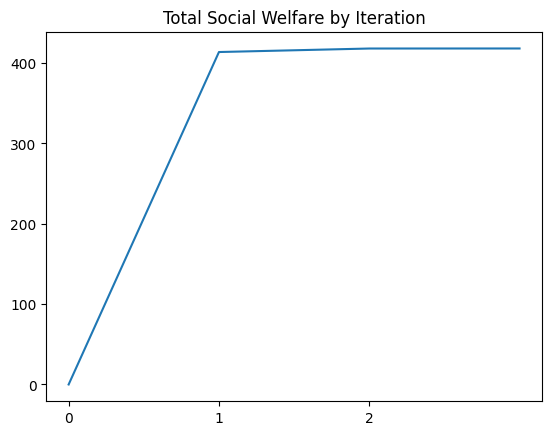

In [28]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

In [29]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

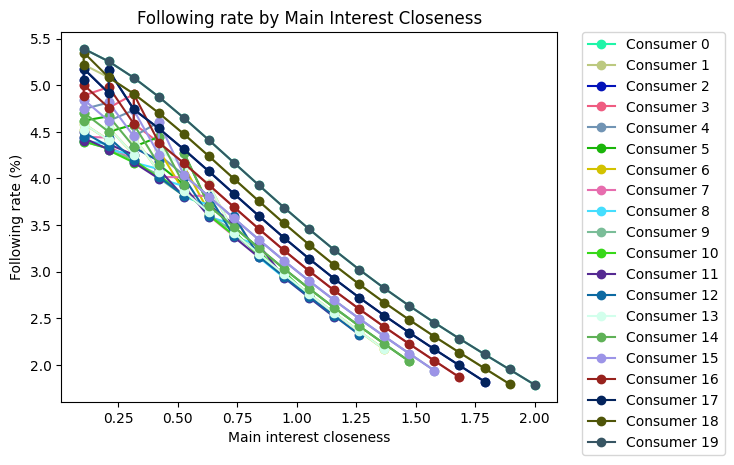

In [30]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

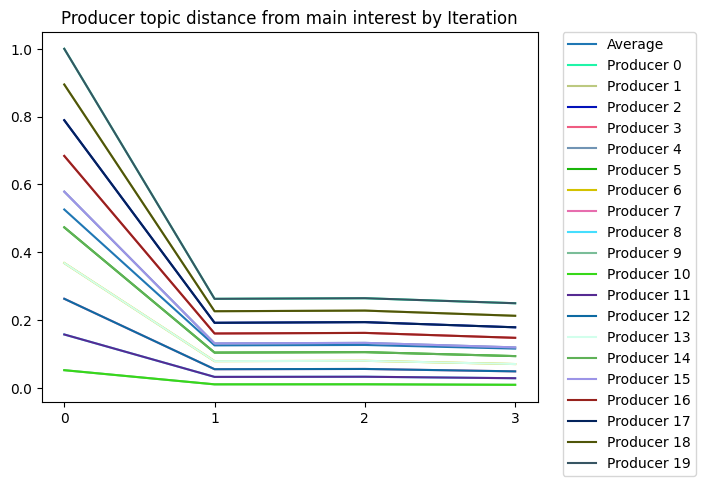

In [31]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

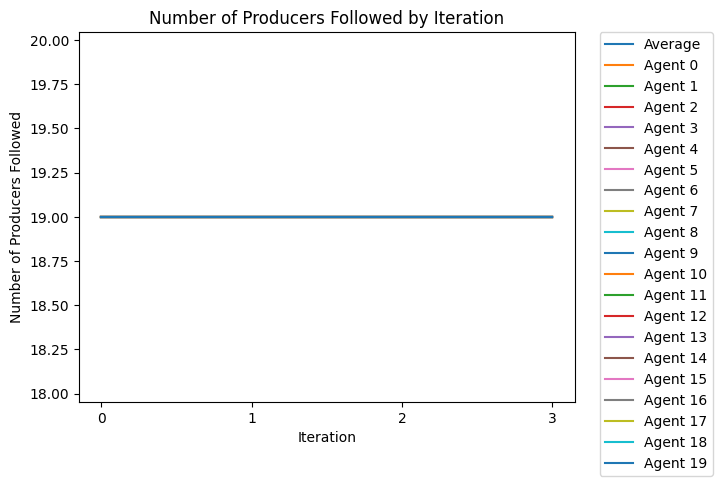

In [32]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[ 1. nan]
 [nan nan]]


/Users/gabeguralnick/git/content-market-experiment/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/gabeguralnick/git/content-market-experiment/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


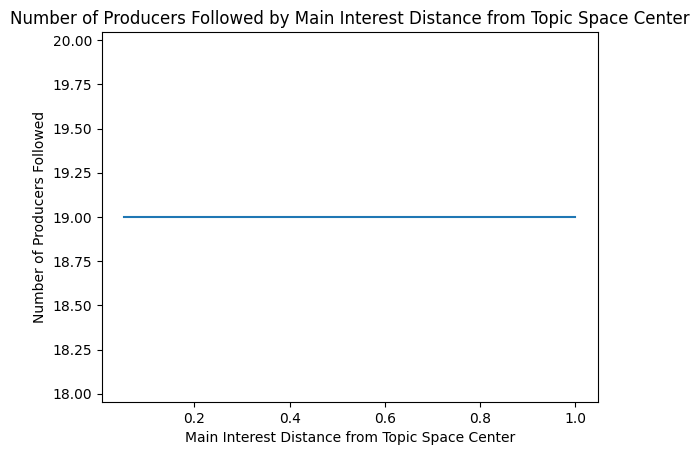

In [33]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

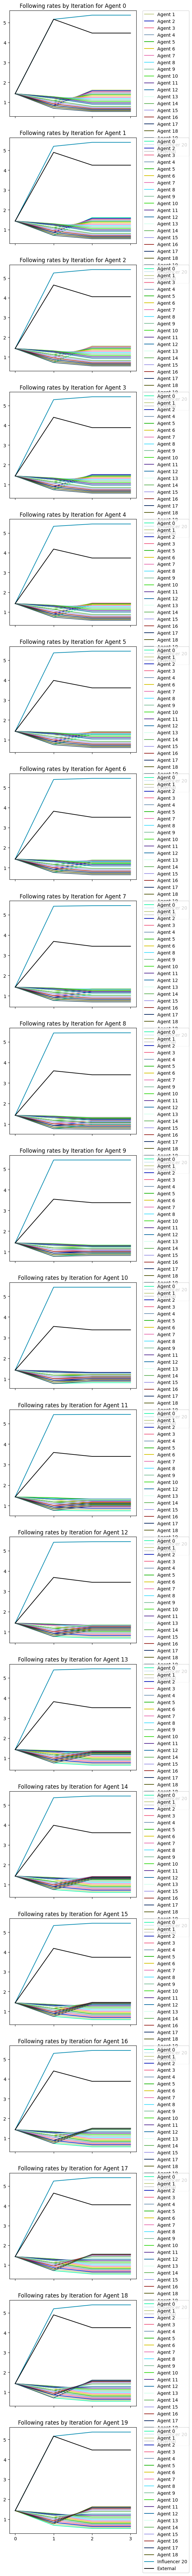

In [34]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [35]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

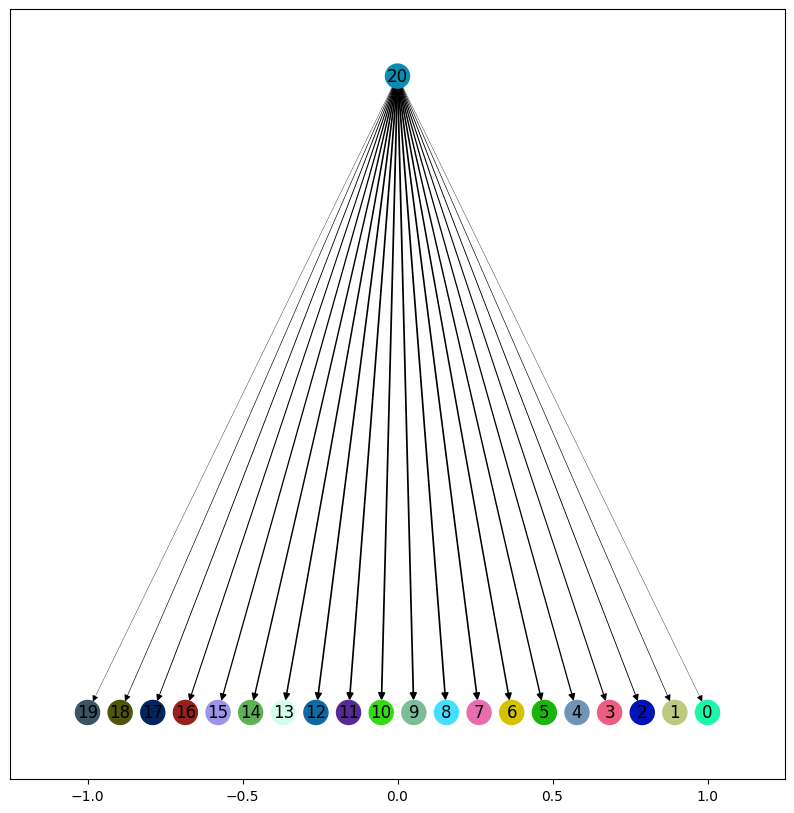

In [36]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

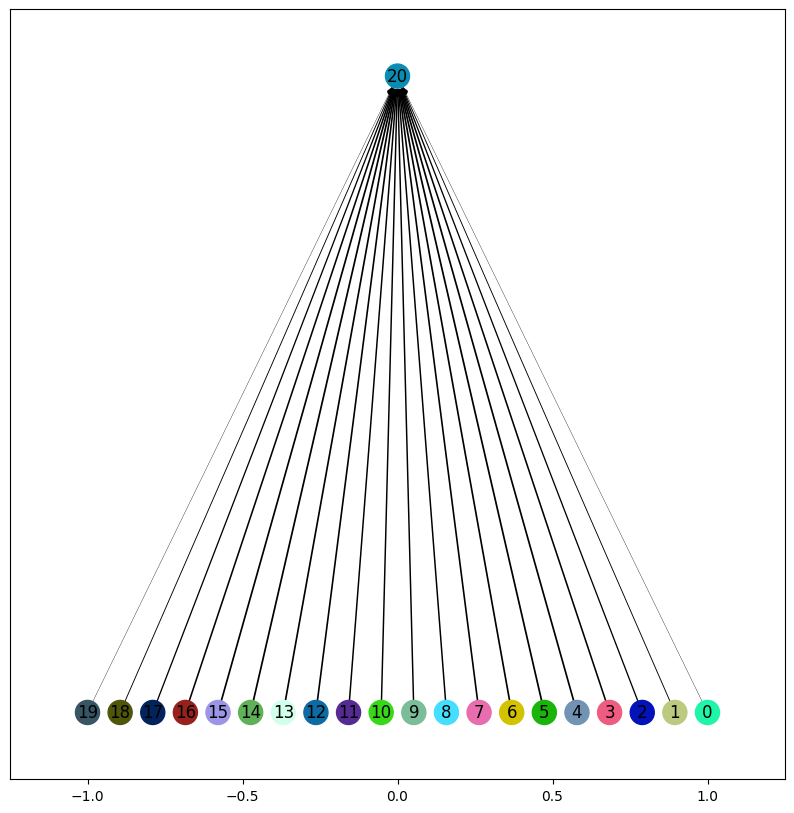

In [37]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

{0: (1.0, 0), 1: (0.894736842105263, 0), 2: (0.7894736842105261, 0), 3: (0.6842105263157894, 0), 4: (0.5789473684210527, 0), 5: (0.4736842105263157, 0), 6: (0.36842105263157876, 0), 7: (0.26315789473684204, 0), 8: (0.1578947368421053, 0), 9: (0.05263157894736836, 0), 10: (-0.052631578947368474, 0), 11: (-0.1578947368421053, 0), 12: (-0.26315789473684215, 0), 13: (-0.368421052631579, 0), 14: (-0.4736842105263158, 0), 15: (-0.5789473684210527, 0), 16: (-0.6842105263157895, 0), 17: (-0.7894736842105263, 0), 18: (-0.8947368421052632, 0), 19: (-1.0, 0), 20: (0, 1), 'External': (1, 1)}


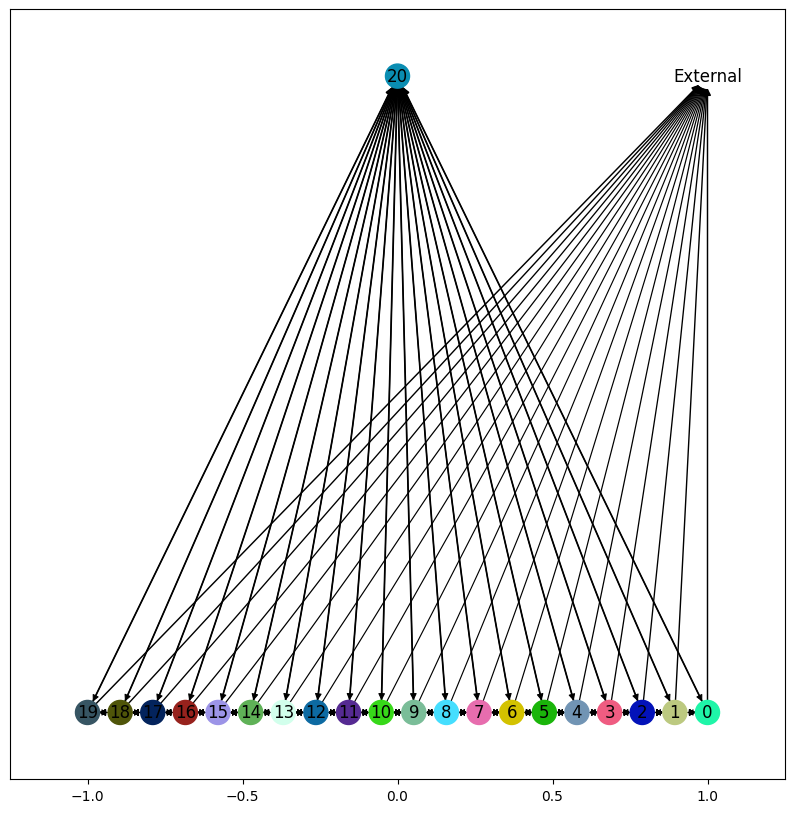

In [38]:
visualize.visualize_market(content_market, stats, agent_colors)

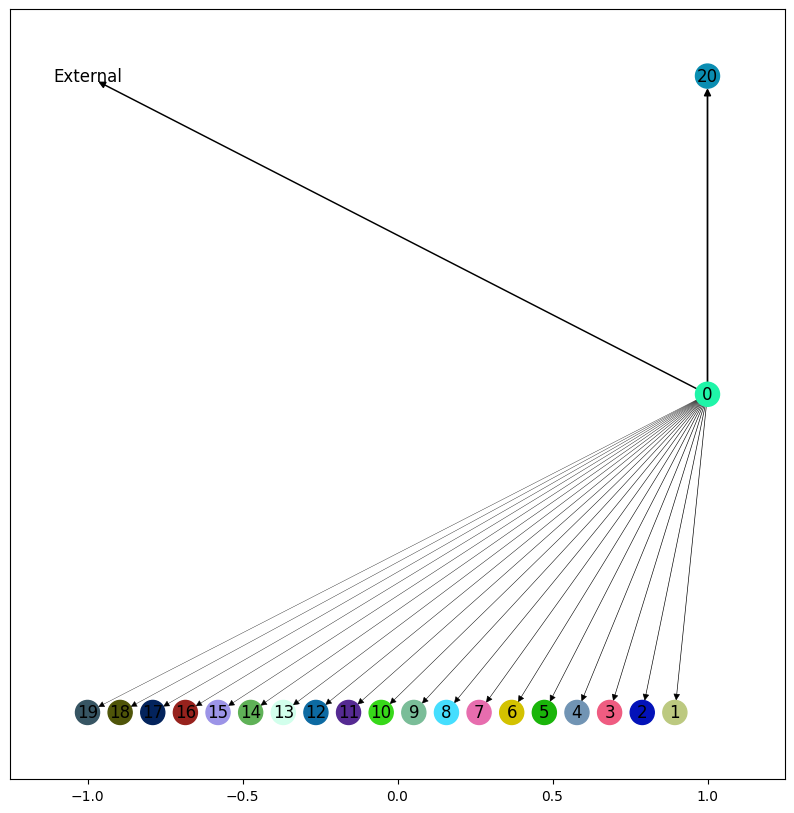

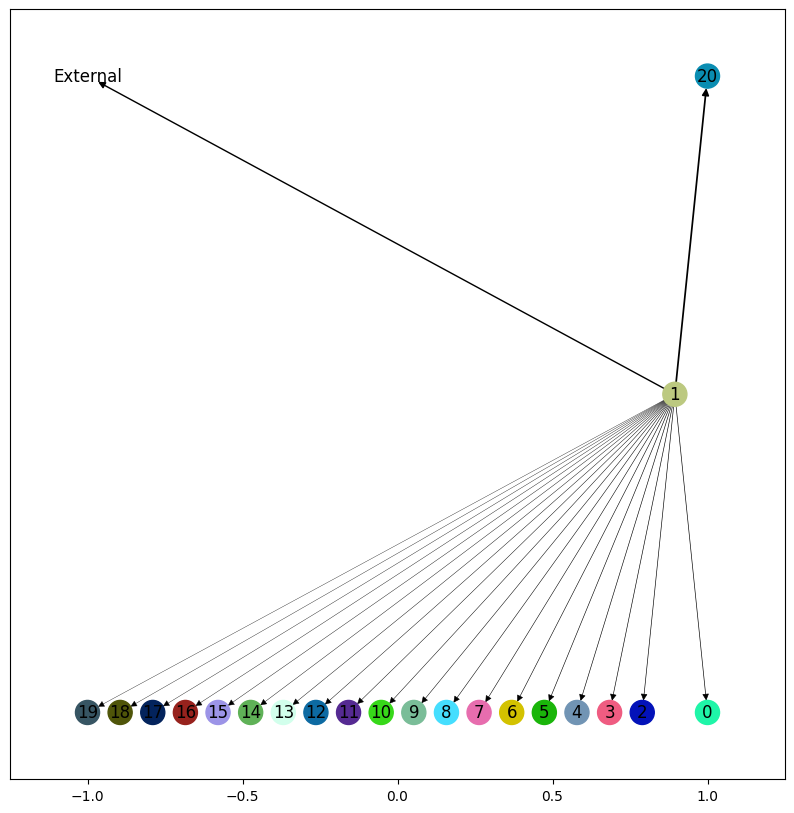

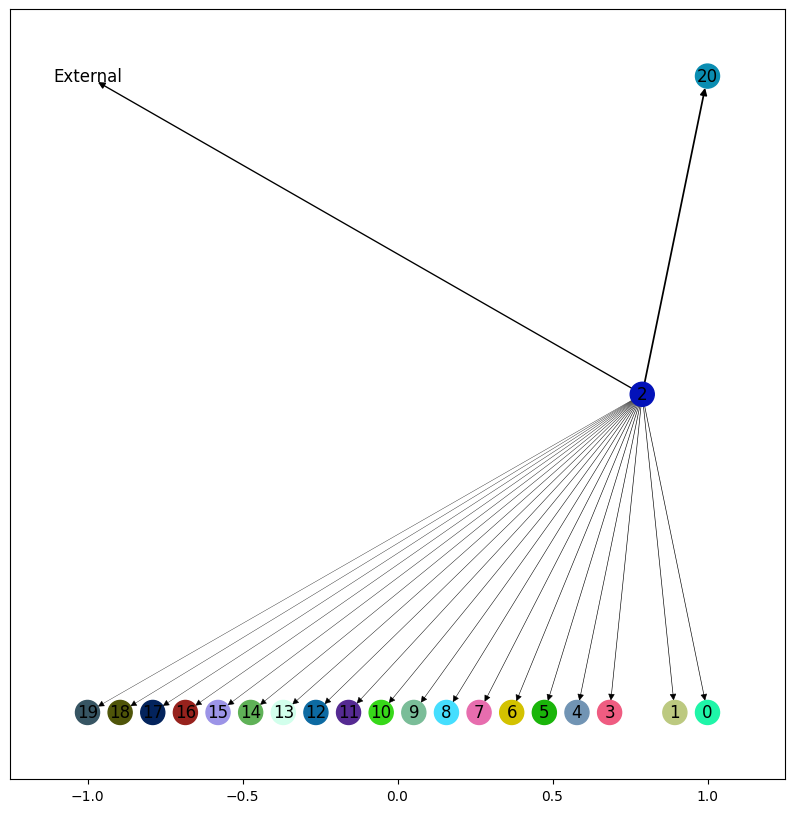

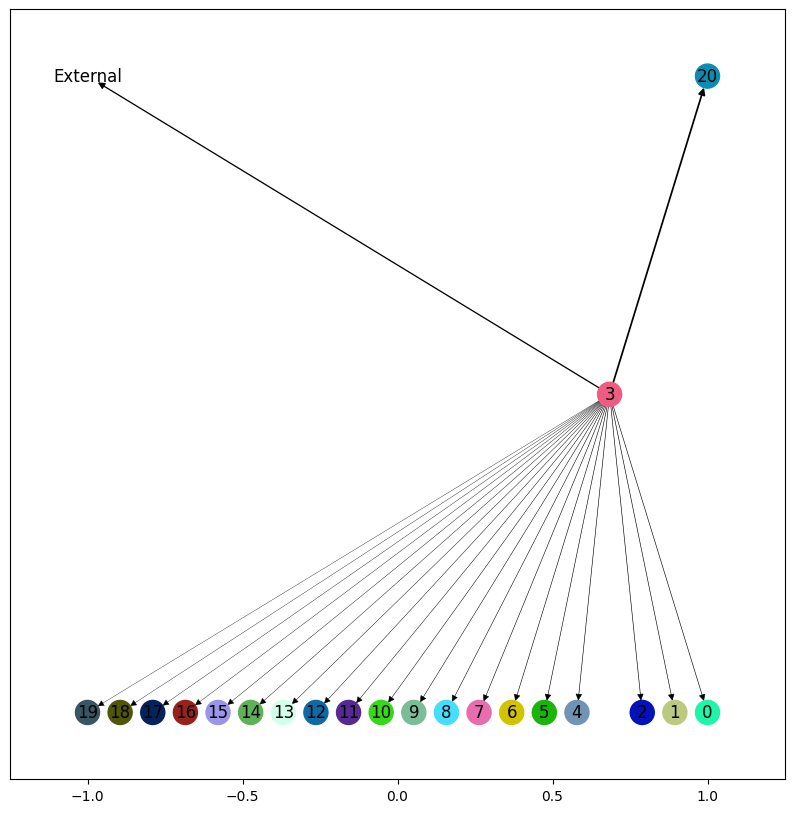

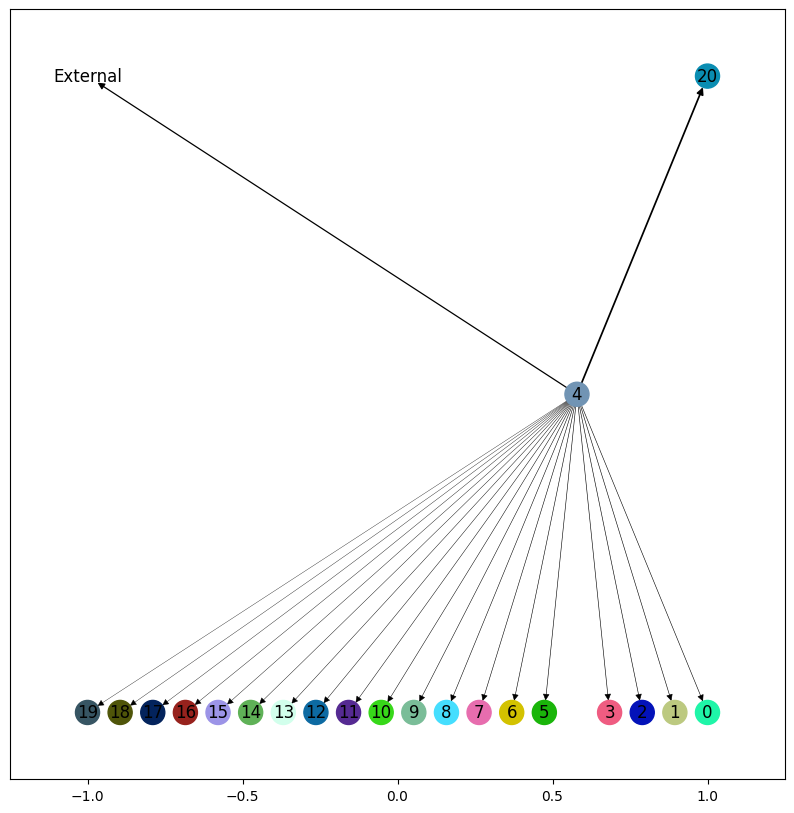

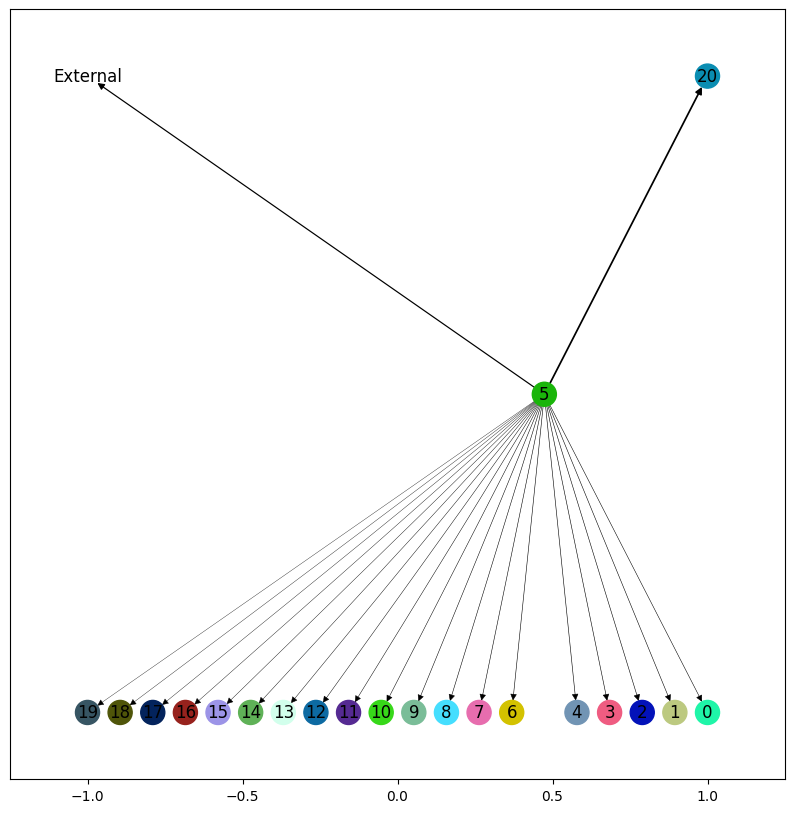

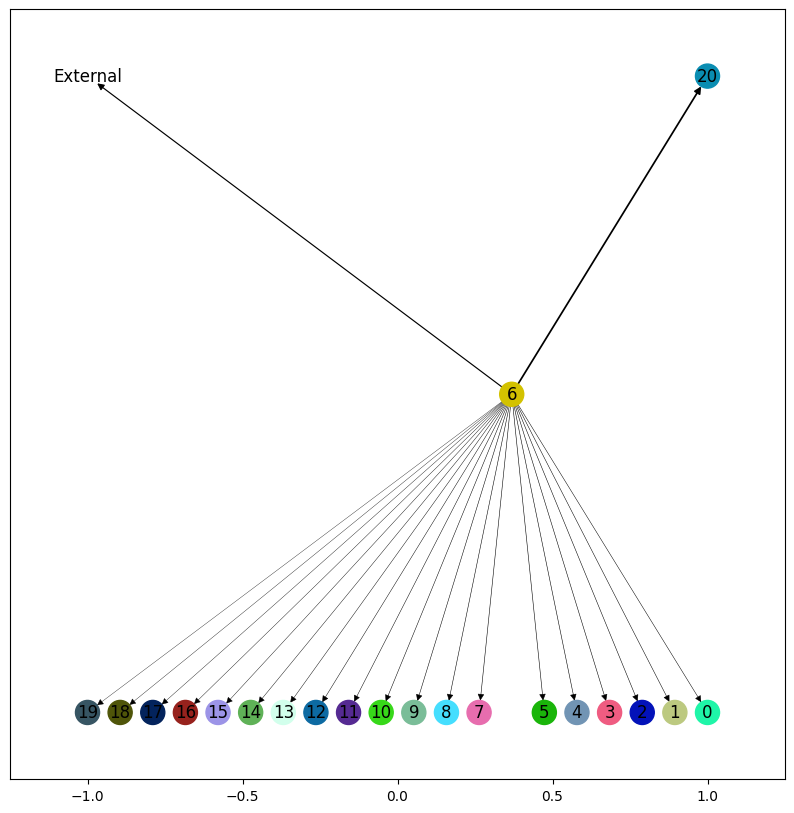

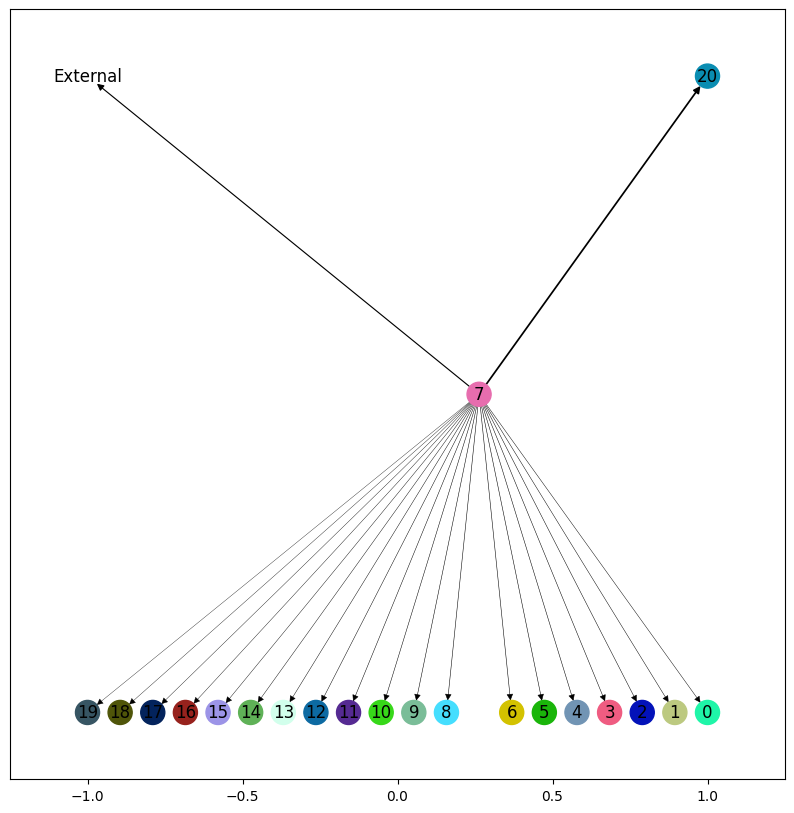

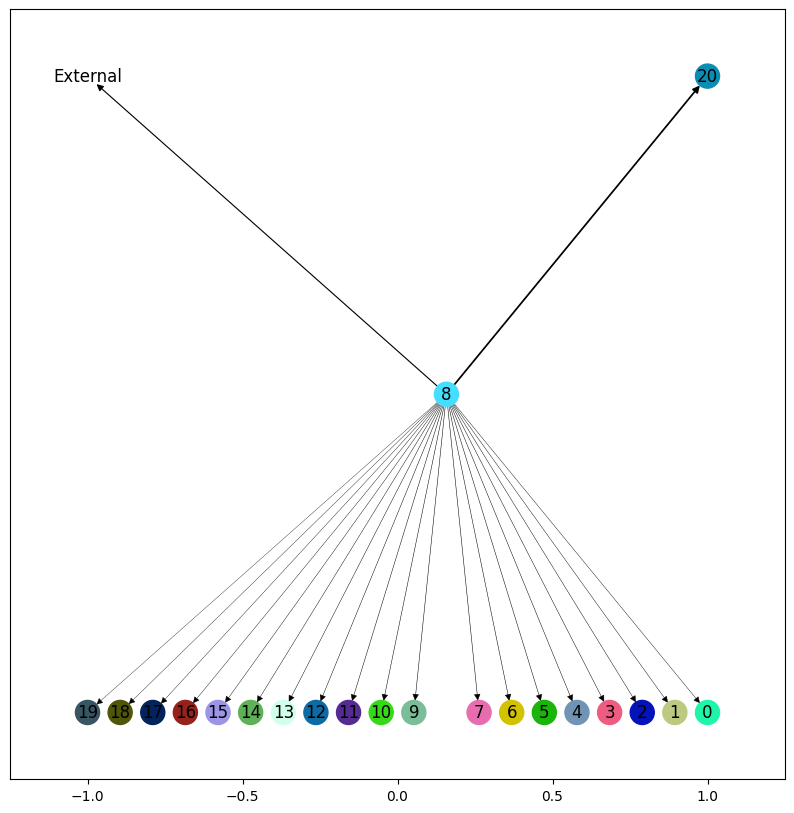

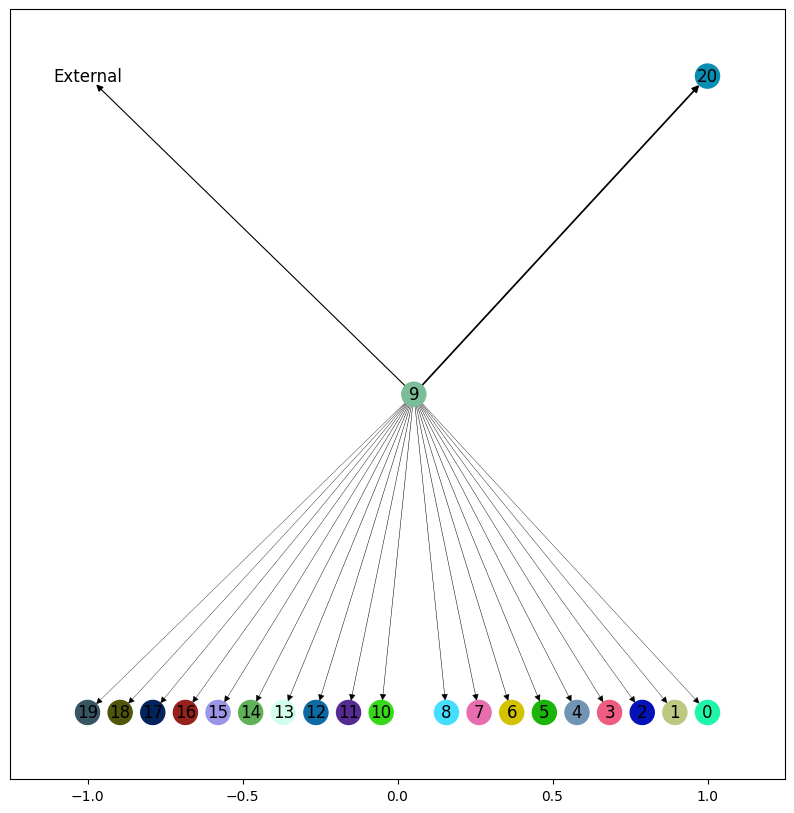

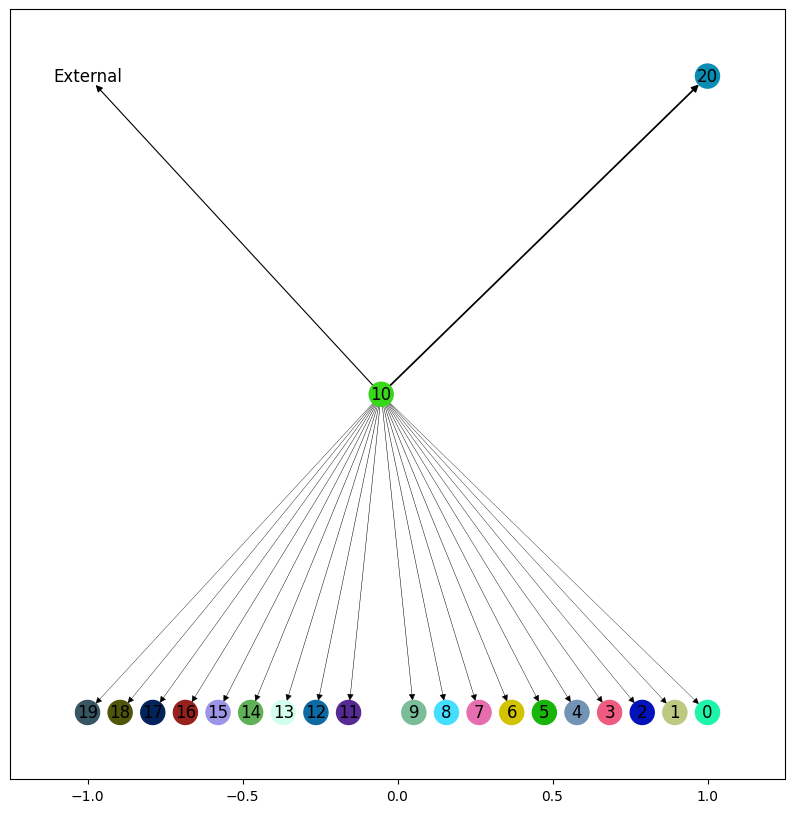

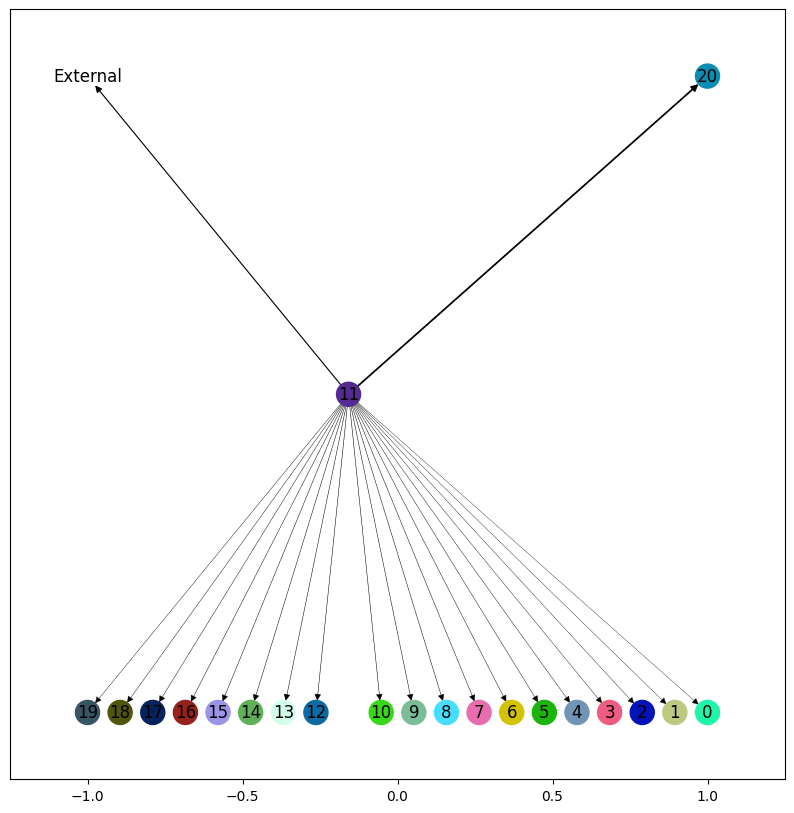

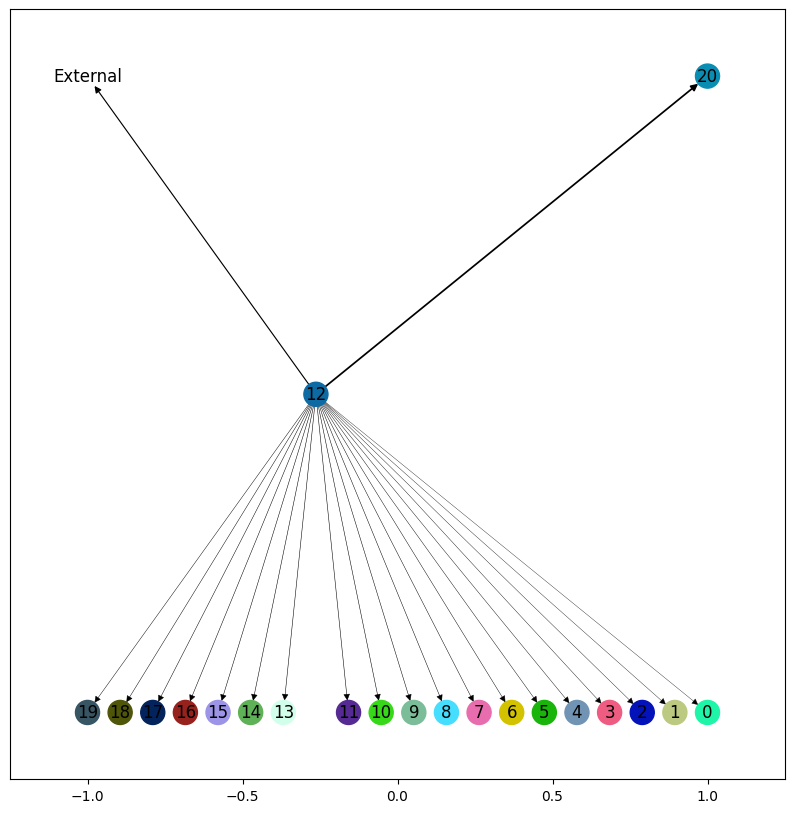

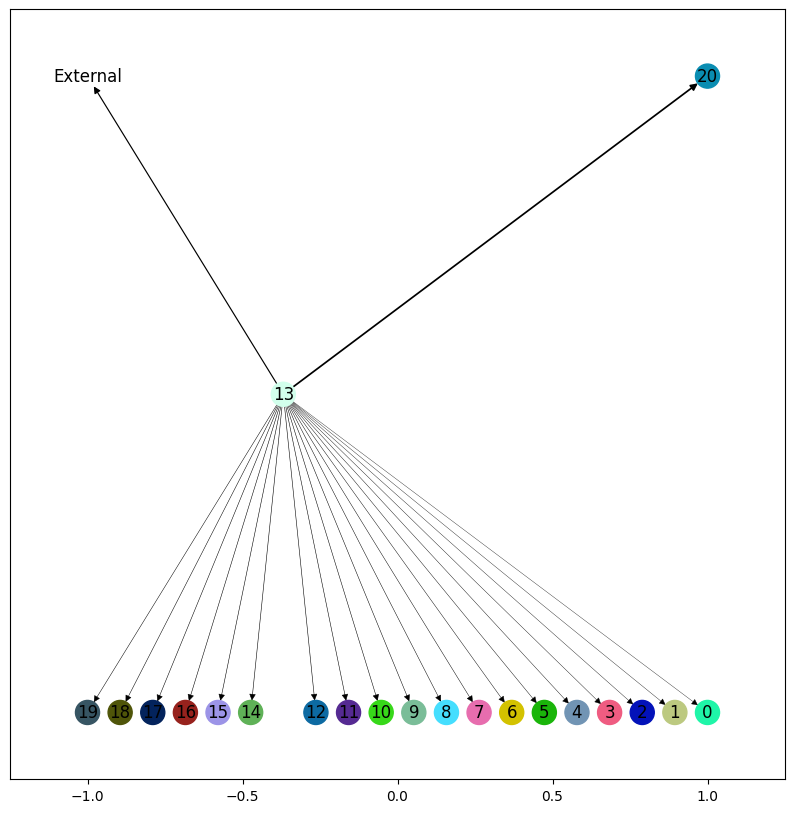

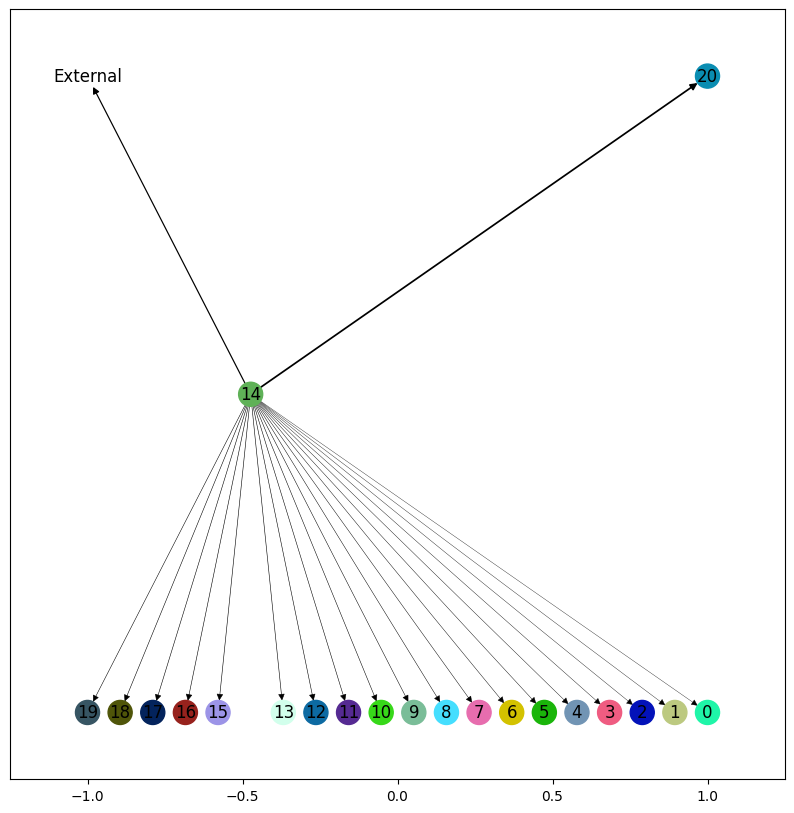

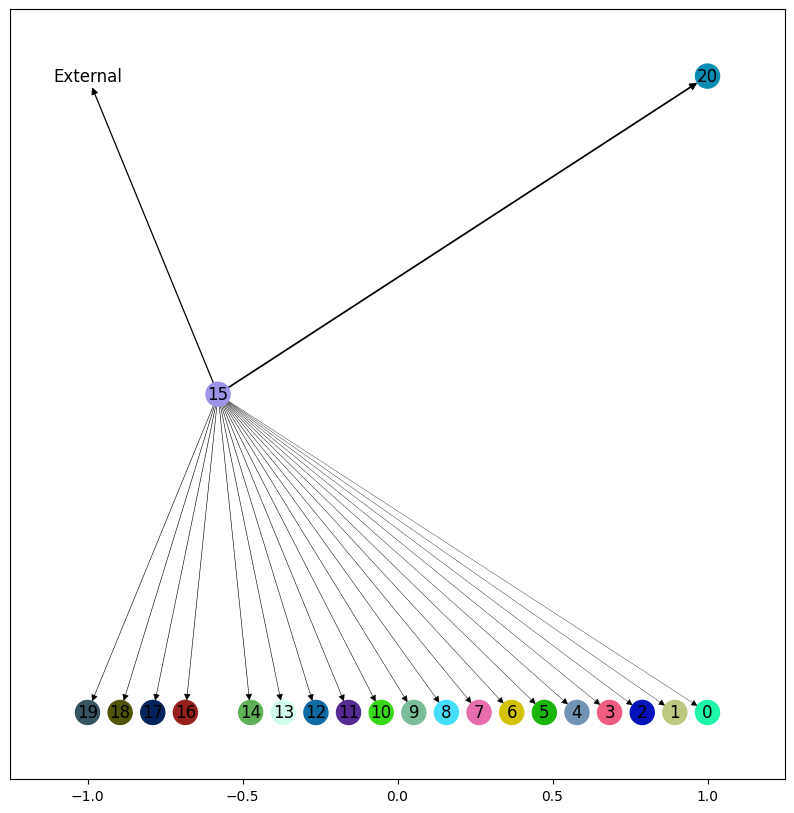

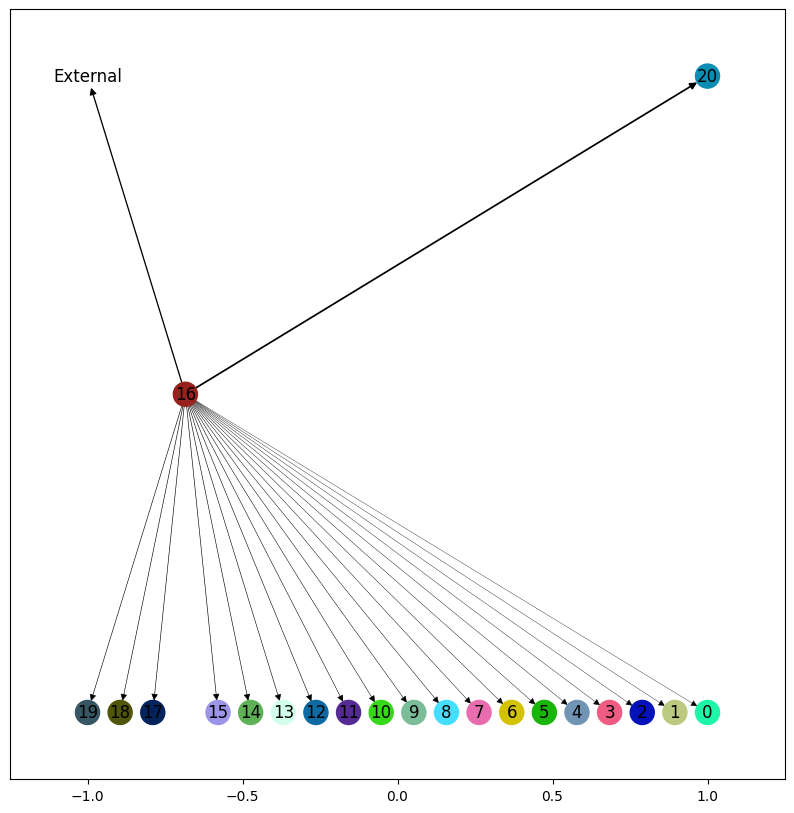

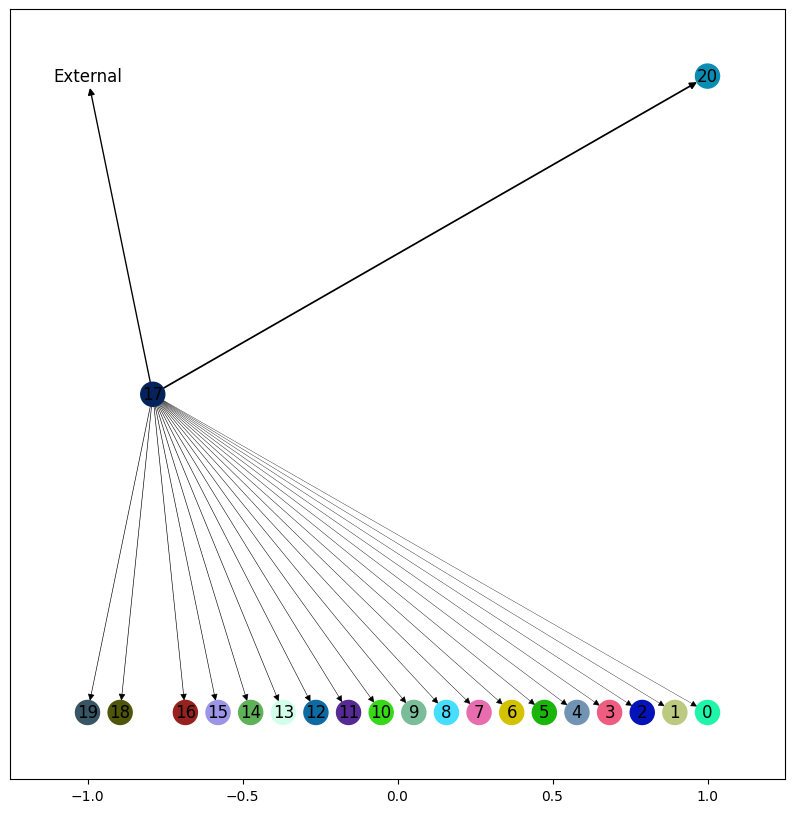

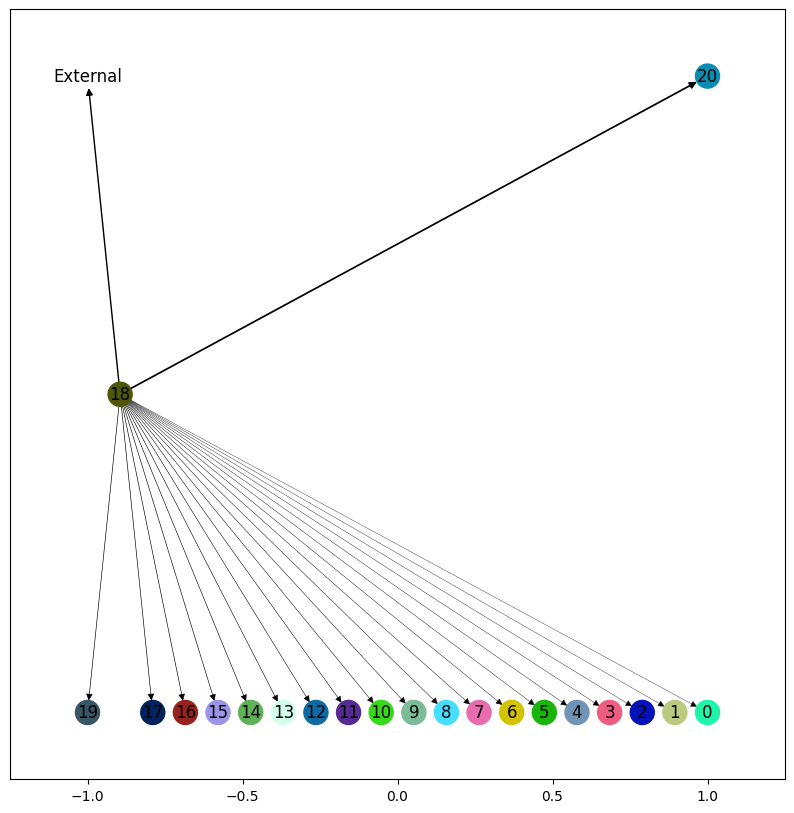

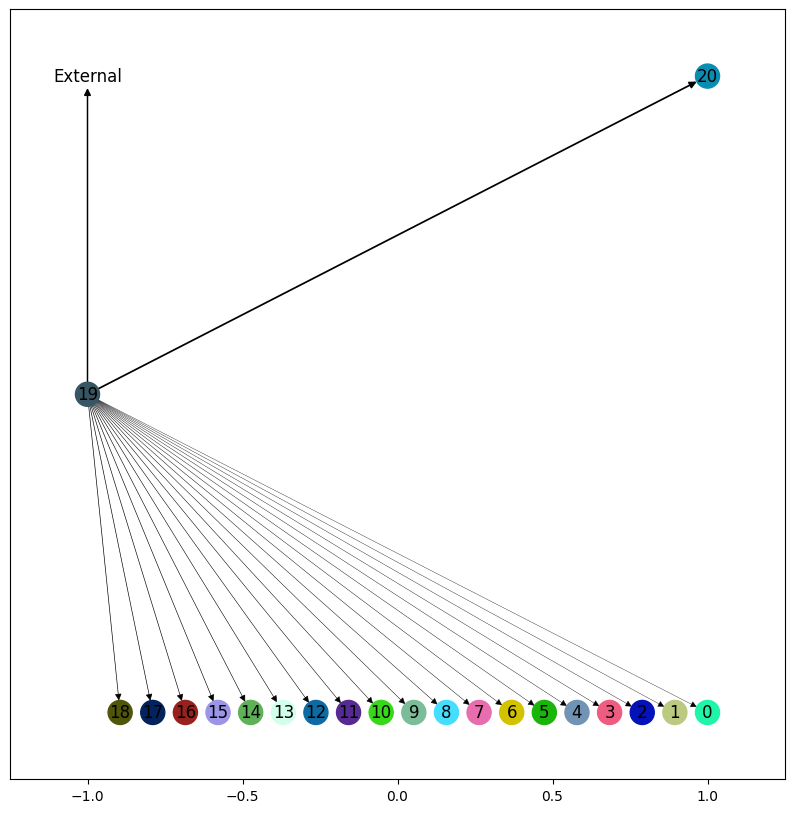

In [39]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

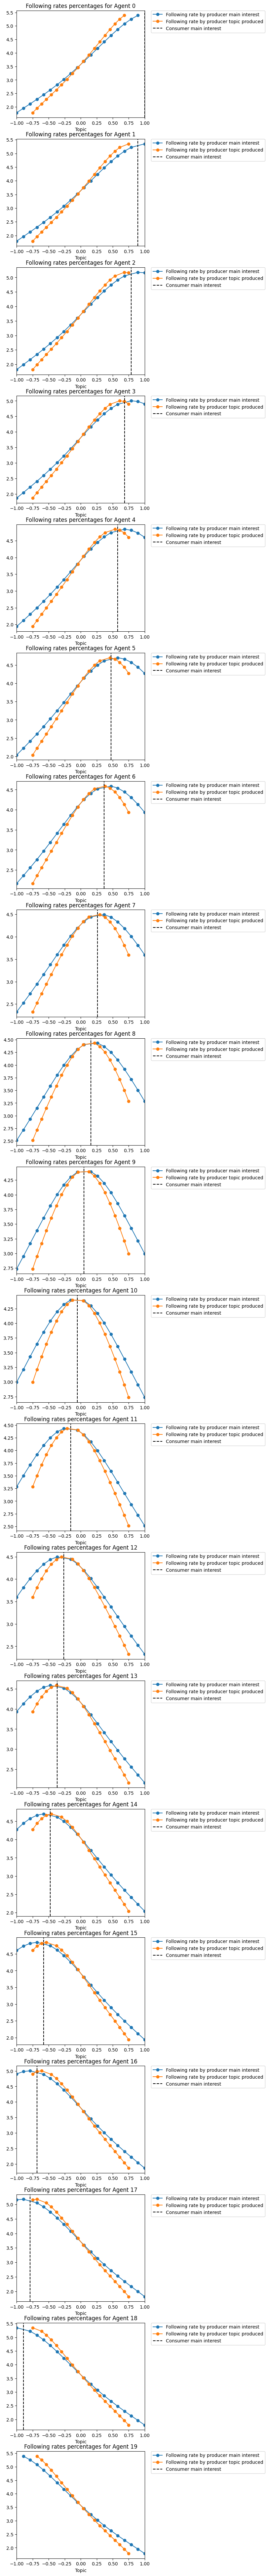

In [40]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

In [41]:
stats.to_dict()

{'num_iterations': 3,
 'total_consumer_utility': [0,
  413.8139629265183,
  418.1783791842813,
  418.2339582744478],
 'total_producer_utility': [0,
  290.05752793135235,
  295.85692943024554,
  295.91887357789733],
 'total_influencer_utility': [0,
  145.67830239341325,
  146.5992457771256,
  146.5787881765854],
 'total_social_welfare': [0,
  413.8139629265183,
  418.1783791842813,
  418.2339582744478],
 'average_consumer_rate_change': [0,
  5.124491527134108,
  1.240985953663703,
  0.0005692332086339972],
 'average_producer_topic_change': [0,
  0.4006093753757646,
  0.0012687460387485645,
  0.010756499899275043],
 'average_influencer_rate_change': [0,
  2.1151884676458623,
  1.4057136755407638,
  0.0],
 'average_consumer_utility_change': [0,
  20.69069814632591,
  0.21822081288815695,
  0.002778954508318332],
 'average_producer_utility_change': [0,
  14.502876396567618,
  0.28997007494466026,
  0.003097207382591627],
 'average_influencer_utility_change': [0,
  145.67830239341325,
  0.9

In [42]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.89473684]),
 array([-0.78947368]),
 array([-0.68421053]),
 array([-0.57894737]),
 array([-0.47368421]),
 array([-0.36842105]),
 array([-0.26315789]),
 array([-0.15789474]),
 array([-0.05263158]),
 array([0.05263158]),
 array([0.15789474]),
 array([0.26315789]),
 array([0.36842105]),
 array([0.47368421]),
 array([0.57894737]),
 array([0.68421053]),
 array([0.78947368]),
 array([0.89473684]),
 array([1.])]